In [159]:
import pandas as pd

train_data = pd.read_csv("fraudTrain.csv")
test_data = pd.read_csv("fraudTest.csv")

In [161]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [162]:
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])

In [163]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [164]:
train_data['year'] = train_data['trans_date_trans_time'].dt.year
train_data['month'] = train_data['trans_date_trans_time'].dt.month
train_data['day'] = train_data['trans_date_trans_time'].dt.day

In [165]:
train_data['time'] = train_data['trans_date_trans_time'].dt.time

In [167]:
train_data['seconds'] = train_data['trans_date_trans_time'].dt.second
train_data['minute'] = train_data['trans_date_trans_time'].dt.minute
train_data['hour'] = train_data['trans_date_trans_time'].dt.hour

In [169]:
train_data['dob'] = pd.to_datetime(train_data['dob'])

In [170]:
train_data['year_of_birth'] = train_data['dob'].dt.year

In [171]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("scaler", StandardScaler())
    ])

In [172]:
from sklearn.preprocessing import OrdinalEncoder
cat_pipeline_ordinal = Pipeline([
        ("cat_encoder_ordinal", OrdinalEncoder()),
        ("scaler", StandardScaler())
    ])

In [173]:
y_train = train_data["is_fraud"]

In [174]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'year', 'month', 'day', 'time',
       'seconds', 'minute', 'hour', 'year_of_birth'],
      dtype='object')

In [175]:
num_attribs = ["amt", "zip", "lat", "long", "city_pop", "unix_time", "merch_lat", "merch_long", "year_of_birth", "year", "month", "day"]
cat_ordinal = ["category", "job", "gender"]

In [176]:
from sklearn.compose import ColumnTransformer

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline_ordinal, cat_ordinal)
])

preprocess_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['amt', 'zip', 'lat', 'long', 'city_pop',
                                  'unix_time', 'merch_lat', 'merch_long',
                                  'year_of_birth', 'year', 'month', 'day']),
                                ('cat',
                                 Pipeline(steps=[('cat_encoder_ordinal',
                                                  OrdinalEncoder()),
                                                 ('scaler', StandardScaler())]),
                                 ['category', 'job', 'gender'])])

In [177]:
X_train = preprocess_pipeline.fit_transform(
    train_data[num_attribs + cat_ordinal])

In [178]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [179]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [180]:
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])

test_data['year'] = test_data['trans_date_trans_time'].dt.year
test_data['month'] = test_data['trans_date_trans_time'].dt.month
test_data['day'] = test_data['trans_date_trans_time'].dt.day

test_data['time'] = test_data['trans_date_trans_time'].dt.time

test_data['seconds'] = test_data['trans_date_trans_time'].dt.second
test_data['minute'] = test_data['trans_date_trans_time'].dt.minute
test_data['hour'] = test_data['trans_date_trans_time'].dt.hour

test_data['dob'] = pd.to_datetime(test_data['dob'])

test_data['year_of_birth'] = test_data['dob'].dt.year

In [181]:
y_test = test_data["is_fraud"]

In [182]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_long,is_fraud,year,month,day,time,seconds,minute,hour,year_of_birth
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,-81.200714,0,2020,6,21,12:14:25,25,14,12,1968
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,-109.960431,0,2020,6,21,12:14:33,33,14,12,1990
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,-74.196111,0,2020,6,21,12:14:53,53,14,12,1970
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,-80.883061,0,2020,6,21,12:15:15,15,15,12,1987
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,-85.884734,0,2020,6,21,12:15:17,17,15,12,1955


In [183]:
X_test = preprocess_pipeline.fit_transform(test_data[num_attribs + cat_ordinal])

In [184]:
y_pred_rd = forest_clf.predict(X_test)

In [185]:
import seaborn as sns

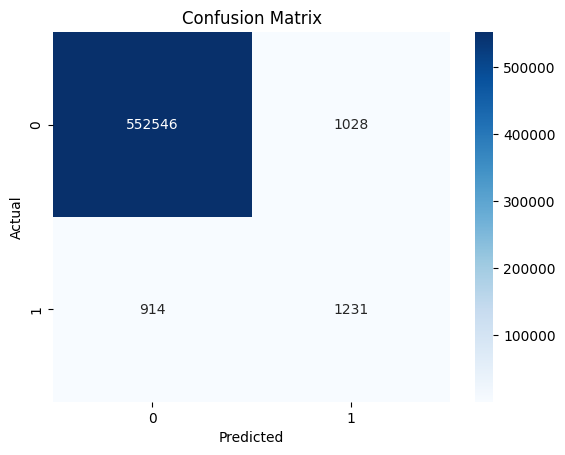

In [186]:
from sklearn.metrics import confusion_matrix

cm_rfc = confusion_matrix(y_test, y_pred_rd)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [187]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_rd))
print("AUC: ", roc_auc_score(y_test, y_pred_rd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.84      0.46      0.59      2145

    accuracy                           1.00    555719
   macro avg       0.92      0.73      0.79    555719
weighted avg       1.00      1.00      1.00    555719

AUC:  0.7275682188544786


In [188]:
from sklearn.linear_model import LogisticRegression

In [189]:
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [190]:
y_pred_lr = logistic_regression.predict(X_test)

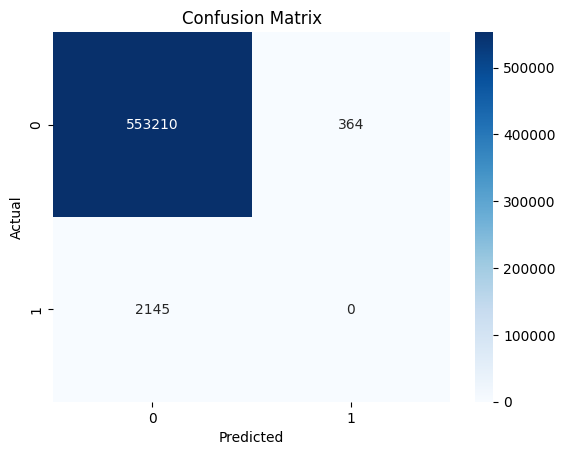

In [191]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [192]:
print(classification_report(y_test, y_pred_lr))
print("AUC: ", roc_auc_score(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

AUC:  0.49967122733365366


In [193]:
from sklearn.tree import DecisionTreeClassifier

In [194]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

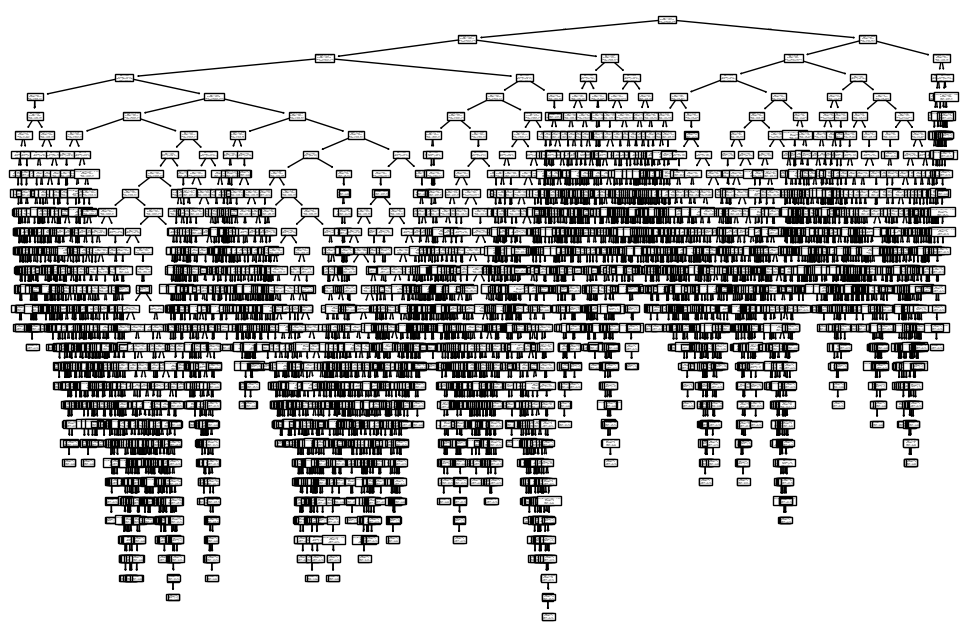

In [195]:
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
feature_names = train_data.columns.tolist()
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=feature_names, class_names=['Genuine', 'Fraud'])
plt.savefig('out.pdf')
plt.show()

In [196]:
y_pred_dt = decision_tree.predict(X_test)

In [197]:
print(classification_report(y_test, y_pred_dt))
print("AUC: ", roc_auc_score(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.54      0.57      0.56      2145

    accuracy                           1.00    555719
   macro avg       0.77      0.79      0.78    555719
weighted avg       1.00      1.00      1.00    555719

AUC:  0.7860178751304419


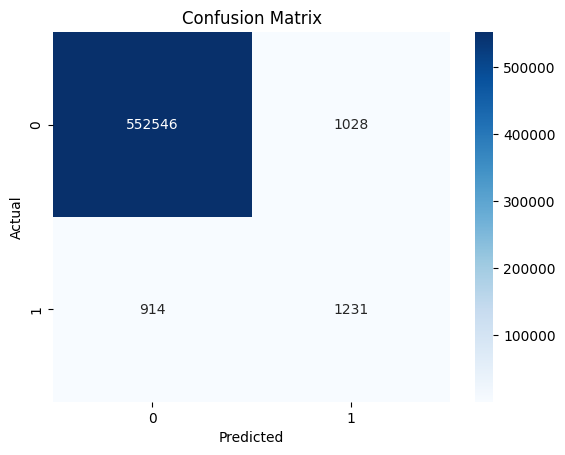

In [198]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
